### Write your name

In [0]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext, SparkSession

#sc is the Spark Context already available at databricks, so we do not need to create it again.
#sc = SparkContext()
# sqlContext = SQLContext(sc)

# from pyspark.sql import SparkSession
sqlContext = SparkSession.builder.appName('abc').getOrCreate()

# Creating RDD (Resilient Distributed Dataset) - fundamental data structure of Spark

In [0]:
products = sc.textFile("/FileStore/tables/SalesData.txt")

In [0]:
products.first()

Out[39]: 'ProductID\tName\tProductNumber\tColor\tStandardCost\tListPrice\tSize\tWeight\tProductCategoryID\tProductModelID\tSellStartDate\tSellEndDate\tDiscontinuedDate\tThumbNailPhoto\tThumbnailPhotoFileName\trowguid\tModifiedDate'

In [0]:
print("The data has {} columns".format(len(products.first().split("\t"))))
header = products.first().split("\t")
header

The data has 17 columns
Out[40]: ['ProductID',
 'Name',
 'ProductNumber',
 'Color',
 'StandardCost',
 'ListPrice',
 'Size',
 'Weight',
 'ProductCategoryID',
 'ProductModelID',
 'SellStartDate',
 'SellEndDate',
 'DiscontinuedDate',
 'ThumbNailPhoto',
 'ThumbnailPhotoFileName',
 'rowguid',
 'ModifiedDate']

In [0]:
head = products.first()
content = products.filter(lambda line: line != head)

In [0]:
content.first()

Out[42]: '680\tHL Road Frame - Black, 58\tFR-R92B-58\tBlack\t1059.31\t1431.50\t58\t1016.04\t18\t6\t1998-06-01 00:00:00.000\tNULL\tNULL\t0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000\tno_image_available_small.gif\t43DD68D6-14A4-461F-9069-55309D90EA7E\t2004-03-11 10:01:36.827'

In [0]:
content.map(lambda line: len(line.split("\t"))).distinct().collect()[0]

Out[43]: 17

# Example of RDD using Scala

In [0]:
rdd1 = (content.filter(lambda line: line.split("\t"))
 .map(lambda line: (line.split("\t")))
)
rdd1.take(1)

Out[44]: [['680',
  'HL Road Frame - Black, 58',
  'FR-R92B-58',
  'Black',
  '1059.31',
  '1431.50',
  '58',
  '1016.04',
  '18',
  '6',
  '1998-06-01 00:00:00.000',
  'NULL',
  'NULL',
  '0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
  'no_image_available_small.gif',
  '43DD68D6-14A4-461F-9069-55309D90EA7E',
  '2004-03-11 10:01:36.827']]

# Converting RDD into Spark Dataframe

In [0]:
df = rdd1.toDF(header)
df.show()

+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|ProductID|                Name|ProductNumber|Color|StandardCost|ListPrice|Size| Weight|ProductCategoryID|ProductModelID|       SellStartDate|         SellEndDate|DiscontinuedDate|      ThumbNailPhoto|ThumbnailPhotoFileName|             rowguid|        ModifiedDate|
+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|      680|HL Road Frame - B...|   FR-R92B-58|Black|     1059.31|  1431.50|  58|1016.04|               18|             6|1998-06-01 00:00:...|                NULL|            NULL|0x474946383961500..

# Using Two Different Code/Syntax
## Spark Dataframe syntax and SQL Table syntax

### Spark Dataframe syntax

In [0]:
# selecting two columns Name and Weight from original dataframe and convert into their proper datatype. Default is string
spark_df = df.select(df.Name, df.Weight.cast("float"))
spark_df.show(5, truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |null   |
|Sport-100 Helmet, Black  |null   |
|Mountain Bike Socks, M   |null   |
+-------------------------+-------+
only showing top 5 rows



### SQL Table syntax
First convert the original Spark Dataframe df into SQL Table and then write SQL syntax

In [0]:
# convert the original Spark Dataframe df into SQL Table
df.createOrReplaceTempView("df_table")
# write SQL query syntax
sqlContext.sql(" SELECT Name, cast(Weight as float) FROM df_table limit 5").show(truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |null   |
|Sport-100 Helmet, Black  |null   |
|Mountain Bike Socks, M   |null   |
+-------------------------+-------+



## Write your solutions using Spark Dataframe syntax and Spark SQL syntax. Your output should match with the RDD output

#### 1. Find the names and weight of the top 15 products by weight. Sort weight by descending order.

##### Using RDD

In [0]:
(content.filter(lambda line: line.split("\t")[7] != "NULL")
 .map(lambda line: (line.split("\t")[1], float(line.split("\t")[7])))
                     .takeOrdered(15, lambda x : -x[1])
                    )

Out[48]: [('Touring-3000 Blue, 62', 13607.7),
 ('Touring-3000 Yellow, 62', 13607.7),
 ('Touring-3000 Blue, 58', 13562.34),
 ('Touring-3000 Yellow, 58', 13512.45),
 ('Touring-3000 Blue, 54', 13462.55),
 ('Touring-3000 Yellow, 54', 13344.62),
 ('Touring-3000 Yellow, 50', 13213.08),
 ('Touring-3000 Blue, 50', 13213.08),
 ('Touring-3000 Yellow, 44', 13049.78),
 ('Touring-3000 Blue, 44', 13049.78),
 ('Mountain-500 Silver, 52', 13008.96),
 ('Mountain-500 Black, 52', 13008.96),
 ('Mountain-500 Silver, 48', 12891.03),
 ('Mountain-500 Black, 48', 12891.03),
 ('Mountain-500 Silver, 44', 12759.49)]

##### Using Spark DataFrame

In [0]:
sorted_df = spark_df.orderBy("Weight", ascending=False)

first_15_products = sorted_df.limit(15)

first_15_products.show(truncate=False)


+-----------------------+--------+
|Name                   |Weight  |
+-----------------------+--------+
|Touring-3000 Yellow, 62|13607.7 |
|Touring-3000 Blue, 62  |13607.7 |
|Touring-3000 Blue, 58  |13562.34|
|Touring-3000 Yellow, 58|13512.45|
|Touring-3000 Blue, 54  |13462.55|
|Touring-3000 Yellow, 54|13344.62|
|Touring-3000 Yellow, 50|13213.08|
|Touring-3000 Blue, 50  |13213.08|
|Touring-3000 Yellow, 44|13049.78|
|Touring-3000 Blue, 44  |13049.78|
|Mountain-500 Silver, 52|13008.96|
|Mountain-500 Black, 52 |13008.96|
|Mountain-500 Silver, 48|12891.03|
|Mountain-500 Black, 48 |12891.03|
|Mountain-500 Silver, 44|12759.49|
+-----------------------+--------+



##### Using Spark SQL

In [0]:
%sql
SELECT Name, CAST(Weight AS FLOAT) AS Weight
FROM df_table
WHERE Weight IS NOT NULL
ORDER BY Weight DESC
LIMIT 15

Name,Weight
"Touring-3000 Yellow, 62",13607.7
"Touring-3000 Blue, 62",13607.7
"Touring-3000 Blue, 58",13562.34
"Touring-3000 Yellow, 58",13512.45
"Touring-3000 Blue, 54",13462.55
"Touring-3000 Yellow, 54",13344.62
"Touring-3000 Yellow, 50",13213.08
"Touring-3000 Blue, 50",13213.08
"Touring-3000 Yellow, 44",13049.78
"Touring-3000 Blue, 44",13049.78


#### 2. Retrieve product details (name, color, size, product model ID) for products where the product model ID is 5

##### Using RDD

In [0]:
(content.filter(lambda line:line.split("\t")[9]=="5")
 .map(lambda line: (line.split("\t")[1],line.split("\t")[3], line.split("\t")[6], line.split("\t")[9])).collect()
)

Out[51]: [('HL Mountain Frame - Silver, 42', 'Silver', '42', '5'),
 ('HL Mountain Frame - Silver, 44', 'Silver', '44', '5'),
 ('HL Mountain Frame - Silver, 48', 'Silver', '48', '5'),
 ('HL Mountain Frame - Silver, 46', 'Silver', '46', '5'),
 ('HL Mountain Frame - Black, 42', 'Black', '42', '5'),
 ('HL Mountain Frame - Black, 44', 'Black', '44', '5'),
 ('HL Mountain Frame - Black, 48', 'Black', '48', '5'),
 ('HL Mountain Frame - Black, 46', 'Black', '46', '5'),
 ('HL Mountain Frame - Black, 38', 'Black', '38', '5'),
 ('HL Mountain Frame - Silver, 38', 'Silver', '38', '5')]

##### Using Spark Dataframe

In [0]:
required_df = df.filter(df.ProductModelID == 5)

product5_det_df = required_df.select("Name", "Color", "Size", "ProductModelID")

product5_det_df.show(truncate=False)

+------------------------------+------+----+--------------+
|Name                          |Color |Size|ProductModelID|
+------------------------------+------+----+--------------+
|HL Mountain Frame - Silver, 42|Silver|42  |5             |
|HL Mountain Frame - Silver, 44|Silver|44  |5             |
|HL Mountain Frame - Silver, 48|Silver|48  |5             |
|HL Mountain Frame - Silver, 46|Silver|46  |5             |
|HL Mountain Frame - Black, 42 |Black |42  |5             |
|HL Mountain Frame - Black, 44 |Black |44  |5             |
|HL Mountain Frame - Black, 48 |Black |48  |5             |
|HL Mountain Frame - Black, 46 |Black |46  |5             |
|HL Mountain Frame - Black, 38 |Black |38  |5             |
|HL Mountain Frame - Silver, 38|Silver|38  |5             |
+------------------------------+------+----+--------------+



##### Using Spark SQL

In [0]:
%sql
SELECT Name, Color, Size, ProductModelID
FROM df_table
WHERE ProductModelID = 5

Name,Color,Size,ProductModelID
"HL Mountain Frame - Silver, 42",Silver,42,5
"HL Mountain Frame - Silver, 44",Silver,44,5
"HL Mountain Frame - Silver, 48",Silver,48,5
"HL Mountain Frame - Silver, 46",Silver,46,5
"HL Mountain Frame - Black, 42",Black,42,5
"HL Mountain Frame - Black, 44",Black,44,5
"HL Mountain Frame - Black, 48",Black,48,5
"HL Mountain Frame - Black, 46",Black,46,5
"HL Mountain Frame - Black, 38",Black,38,5
"HL Mountain Frame - Silver, 38",Silver,38,5


#### 3. Retrieve the name and product number of the products that have a color of 'black', 'red', or 'white' and a size of 'S' or 'M'

##### Using RDD

In [0]:
colors = ["White","Black","Red"]
sizes = ["S","M"]

(content.filter(lambda line: line.split("\t")[6] in sizes)
.filter(lambda line: line.split("\t")[3] in colors)
.map(lambda line: (line.split("\t")[1],line.split("\t")[2], line.split("\t")[3],line.split("\t")[6]))
 .collect()
)

Out[61]: [('Mountain Bike Socks, M', 'SO-B909-M', 'White', 'M'),
 ("Men's Sports Shorts, S", 'SH-M897-S', 'Black', 'S'),
 ("Men's Sports Shorts, M", 'SH-M897-M', 'Black', 'M'),
 ("Women's Tights, S", 'TG-W091-S', 'Black', 'S'),
 ("Women's Tights, M", 'TG-W091-M', 'Black', 'M'),
 ('Half-Finger Gloves, S', 'GL-H102-S', 'Black', 'S'),
 ('Half-Finger Gloves, M', 'GL-H102-M', 'Black', 'M'),
 ('Full-Finger Gloves, S', 'GL-F110-S', 'Black', 'S'),
 ('Full-Finger Gloves, M', 'GL-F110-M', 'Black', 'M'),
 ("Women's Mountain Shorts, S", 'SH-W890-S', 'Black', 'S'),
 ("Women's Mountain Shorts, M", 'SH-W890-M', 'Black', 'M'),
 ('Racing Socks, M', 'SO-R809-M', 'White', 'M')]

##### Using Spark Dataframe

In [0]:
required_df = df.filter((df.Color.isin('Black', 'Red', 'White')) & (df.Size.isin('S', 'M')))

product_details_df = required_df.select("Name", "ProductModelID")

product_details_df.show(truncate=False)



+--------------------------+--------------+
|Name                      |ProductModelID|
+--------------------------+--------------+
|Mountain Bike Socks, M    |18            |
|Men's Sports Shorts, S    |13            |
|Men's Sports Shorts, M    |13            |
|Women's Tights, S         |38            |
|Women's Tights, M         |38            |
|Half-Finger Gloves, S     |4             |
|Half-Finger Gloves, M     |4             |
|Full-Finger Gloves, S     |3             |
|Full-Finger Gloves, M     |3             |
|Women's Mountain Shorts, S|37            |
|Women's Mountain Shorts, M|37            |
|Racing Socks, M           |24            |
+--------------------------+--------------+



##### Using Spark SQL

In [0]:
%sql
SELECT Name, ProductModelID
FROM df_table
WHERE Color IN ('Black', 'Red', 'White')
  AND Size IN ('S', 'M')

Name,ProductModelID
"Mountain Bike Socks, M",18
"Men's Sports Shorts, S",13
"Men's Sports Shorts, M",13
"Women's Tights, S",38
"Women's Tights, M",38
"Half-Finger Gloves, S",4
"Half-Finger Gloves, M",4
"Full-Finger Gloves, S",3
"Full-Finger Gloves, M",3
"Women's Mountain Shorts, S",37


#### 4. Retrieve the product name, product number, color and list price of products whose product number begins with 'BK-'. Retrieve only 15 records and Sort the price in descending order

##### Using RDD

In [0]:
(content.filter(lambda line: "BK" in line.split("\t")[2])
 .map(lambda line: (line.split("\t")[1], line.split("\t")[2], line.split("\t")[3], float(line.split("\t")[5])))
.takeOrdered(15, lambda x: -x[3]))

Out[66]: [('Road-150 Red, 62', 'BK-R93R-62', 'Red', 3578.27),
 ('Road-150 Red, 44', 'BK-R93R-44', 'Red', 3578.27),
 ('Road-150 Red, 48', 'BK-R93R-48', 'Red', 3578.27),
 ('Road-150 Red, 52', 'BK-R93R-52', 'Red', 3578.27),
 ('Road-150 Red, 56', 'BK-R93R-56', 'Red', 3578.27),
 ('Mountain-100 Silver, 38', 'BK-M82S-38', 'Silver', 3399.99),
 ('Mountain-100 Silver, 42', 'BK-M82S-42', 'Silver', 3399.99),
 ('Mountain-100 Silver, 44', 'BK-M82S-44', 'Silver', 3399.99),
 ('Mountain-100 Silver, 48', 'BK-M82S-48', 'Silver', 3399.99),
 ('Mountain-100 Black, 38', 'BK-M82B-38', 'Black', 3374.99),
 ('Mountain-100 Black, 42', 'BK-M82B-42', 'Black', 3374.99),
 ('Mountain-100 Black, 44', 'BK-M82B-44', 'Black', 3374.99),
 ('Mountain-100 Black, 48', 'BK-M82B-48', 'Black', 3374.99),
 ('Road-250 Red, 44', 'BK-R89R-44', 'Red', 2443.35),
 ('Road-250 Red, 48', 'BK-R89R-48', 'Red', 2443.35)]

##### Using Spark Dataframe

In [0]:
filtered_df = df.filter(df.ProductNumber.startswith("BK-"))

required_df = filtered_df.orderBy(df.ListPrice, ascending=False)

product_details_df = required_df.select("Name", "ProductModelID", "Color", "ListPrice")

product_details_df.show(truncate=False)


+-------------------------+--------------+------+---------+
|Name                     |ProductModelID|Color |ListPrice|
+-------------------------+--------------+------+---------+
|Road-650 Black, 52       |30            |Black |782.99   |
|Road-650 Black, 62       |30            |Black |782.99   |
|Road-650 Red, 58         |30            |Red   |782.99   |
|Road-650 Red, 60         |30            |Red   |782.99   |
|Road-650 Red, 62         |30            |Red   |782.99   |
|Road-650 Red, 44         |30            |Red   |782.99   |
|Road-650 Red, 48         |30            |Red   |782.99   |
|Road-650 Red, 52         |30            |Red   |782.99   |
|Road-650 Black, 58       |30            |Black |782.99   |
|Road-650 Black, 60       |30            |Black |782.99   |
|Road-650 Black, 44       |30            |Black |782.99   |
|Road-650 Black, 48       |30            |Black |782.99   |
|Mountain-400-W Silver, 38|22            |Silver|769.49   |
|Mountain-400-W Silver, 40|22           

##### Using Spark SQL

In [0]:
%sql
SELECT Name, ProductModelID, Color, ListPrice
FROM df_table
WHERE ProductNumber LIKE 'BK-%'
ORDER BY ListPrice DESC
LIMIT 15

Name,ProductModelID,Color,ListPrice
"Road-650 Red, 52",30,Red,782.99
"Road-650 Black, 58",30,Black,782.99
"Road-650 Red, 48",30,Red,782.99
"Road-650 Red, 58",30,Red,782.99
"Road-650 Red, 60",30,Red,782.99
"Road-650 Red, 62",30,Red,782.99
"Road-650 Red, 44",30,Red,782.99
"Road-650 Black, 52",30,Black,782.99
"Road-650 Black, 60",30,Black,782.99
"Road-650 Black, 62",30,Black,782.99


#### 5. Visualize Average List Price per Color and Average List Price per Size. Discuss/Explain your results.

In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
%matplotlib inline

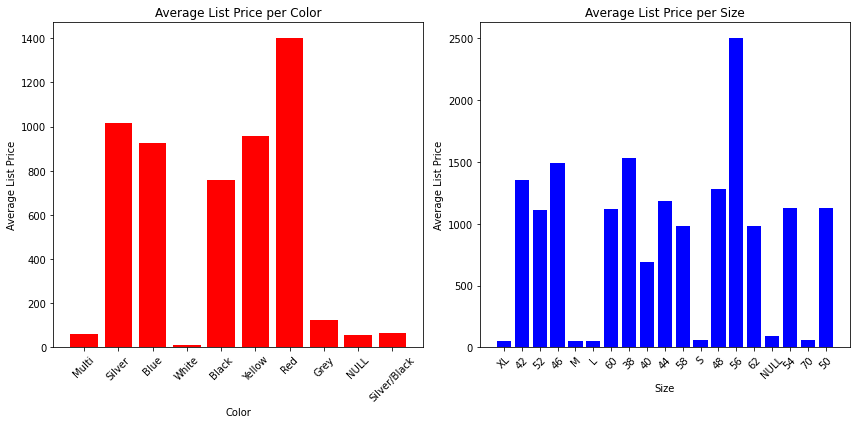

In [0]:
from pyspark.sql.functions import col

df = df.withColumn("ListPrice", col("ListPrice").cast("float"))

avg_price_color = df.groupBy("Color").avg("ListPrice").collect()
avg_price_size = df.groupBy("Size").avg("ListPrice").collect()

avg_price_color_df = pd.DataFrame(avg_price_color, columns=["Color", "AvgListPrice"])
avg_price_size_df = pd.DataFrame(avg_price_size, columns=["Size", "AvgListPrice"])


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(avg_price_color_df["Color"], avg_price_color_df["AvgListPrice"], color='red')
plt.title("Average List Price per Color")
plt.xlabel("Color")
plt.ylabel("Average List Price")
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.bar(avg_price_size_df["Size"], avg_price_size_df["AvgListPrice"], color='blue')
plt.title("Average List Price per Size")
plt.xlabel("Size")
plt.ylabel("Average List Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can observe that the highest average list price is for red products, with the second highest product color in demand being silver. We can also see that the least listed average price is for white products.

Similarly, we can observe that the highest listed average price is for size 56, and that is high by quite a dominant margin. 

#### 6. Visualize Total Count per Size. Discuss/Explain your results.

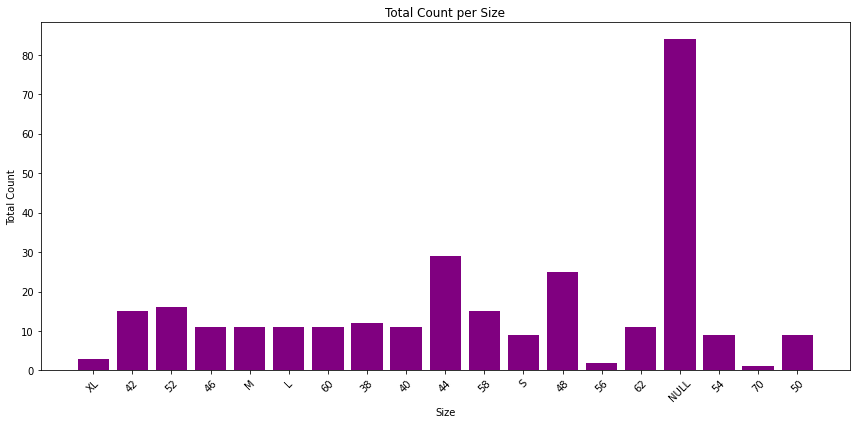

In [0]:
size_count_df = df.groupBy("Size").count()

size_count_pd = size_count_df.toPandas()


plt.figure(figsize=(12, 6))

plt.bar(size_count_pd["Size"], size_count_pd["count"], color='purple')
plt.title("Total Count per Size")
plt.xlabel("Size")
plt.ylabel("Total Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Total count in non null values is highest for size 44. And it is not surprising that the second least count is for 56 size, which was with the most highly listed average price as well. This might be due to high supply and low demand.

# Using Machine Learning Library (For Practice)

In [0]:
dfall = df.select(df.Weight.cast("float"), df.Size.cast("float"), df.ListPrice.cast("float"))
dfall.show(5, truncate=False)

In [0]:
dfall = dfall.na.drop("any")

In [0]:
feature_columns = dfall.columns[:-1] # here we omit the final column for prediction
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")

In [0]:
data_2 = assembler.transform(dfall)

In [0]:
data_2.show()

In [0]:
from pyspark.ml.regression import LinearRegression

In [0]:
algo = LinearRegression(featuresCol="features", labelCol="ListPrice")

In [0]:
model = algo.fit(data_2)

In [0]:
evaluation_summary = model.evaluate(data_2)

In [0]:
evaluation_summary.rootMeanSquaredError

In [0]:
evaluation_summary.r2